In [1]:
import pandas as pd
import numpy as np

In [2]:
# tmp = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')
# tmp_2 = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')

In [3]:
# tmp_2.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)

In [4]:
# tmp.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)

In [5]:
# df = pd.concat([tmp, tmp_2])

In [6]:
# X = df.loc[:, df.columns!='Personality (Class label)']

In [7]:
# y = df.loc[:, df.columns=='Personality (Class label)']

In [8]:
# male_df = df[df['Gender'] == 'Male']

In [9]:
# female_df = df[df['Gender'] == 'Female']

In [10]:
# # getting all the columns
# cols = set(male_df.columns)
 
# # removing the desired column
# cols.remove('Personality (Class label)')
# cols.remove('Gender')
# cols = list(cols)
# X_male = male_df[cols]
# y_male = male_df.loc[:, male_df.columns=='Personality (Class label)']

In [11]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_male, y_male,
#                                                     stratify=y_male, 
#                                                     test_size=0.30)

In [12]:
from sklearn.model_selection import train_test_split

def df_load_and_split(gender='male'):
    tmp = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')
    tmp.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)
    tmp_2 = pd.read_csv('/media/scarlet/Project/Project Files/Data/Personality/test.csv')
    tmp_2.rename(columns={'Personality (class label)':'Personality (Class label)'}, inplace=True)
    df = pd.concat([tmp, tmp_2])
    if gender == 'male':
        df = df[df['Gender'] == 'Male']
    else:
        df = df[df['Gender'] == 'Female']
    cols = set(df.columns)
    cols.remove('Personality (Class label)')
    cols.remove('Gender')
    cols = list(cols)
    X = df[cols]
    y = df.loc[:, df.columns=='Personality (Class label)']
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        stratify=y, 
                                                        test_size=0.30)
    return (X_train, X_test, y_train, y_test)

X_train, X_test, y_train, y_test = df_load_and_split('male')

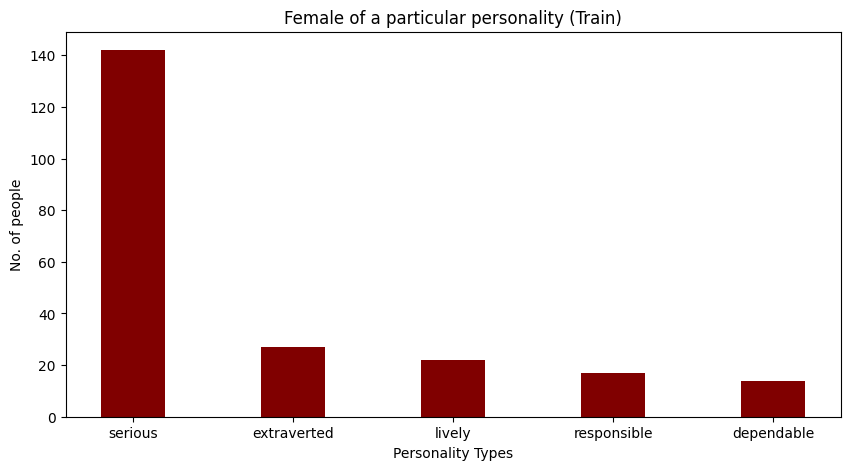

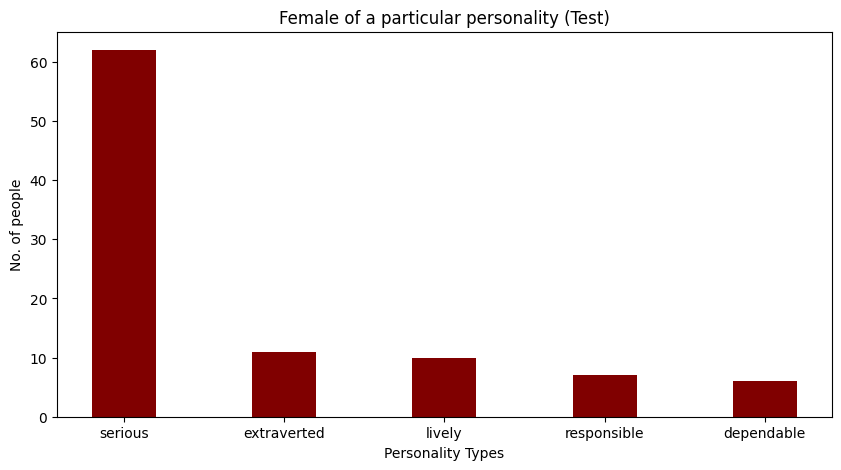

In [13]:
def draw_bars(X_train, X_test, y_train, y_test, gender='male'):
    import matplotlib.pyplot as plt
    for i in y_train, y_test:
        tmp = i.value_counts() # .count()
        fig = plt.figure(figsize = (10, 5))
        # creating the bar plot
        plt.bar(list(i['Personality (Class label)'].value_counts()._get_axis(axis=0)),
                list(i['Personality (Class label)'].value_counts()), color ='maroon',
                width = 0.4)

        plt.xlabel("Personality Types")
        plt.ylabel("No. of people")

        if len(i) == len(y_train):
            tmp = gender.title() + " of a particular personality (Train)"
            plt.title(tmp)
        else:
            tmp = gender.title() + " of a particular personality (Test)"
            plt.title(tmp)

        plt.show()
        
draw_bars(X_train, X_test, y_train, y_test, 'female')

In [14]:
X_train

,conscientiousness,extraversion,openness,agreeableness,neuroticism,Age
225,7,3,7,4,8,19
259,7,7,7,6,4,20
58,7,6,5,7,2,19
8,5,6,6,6,4,20
221,5,5,5,4,7,18
...,...,...,...,...,...,...
264,5,5,4,4,4,19
273,7,6,3,4,2,17
63,4,7,5,2,5,19
180,4,4,7,5,1,17


In [15]:
y_train

,Personality (Class label)
225,extraverted
259,serious
58,serious
8,serious
221,extraverted
...,...
264,serious
273,serious
63,serious
180,lively


In [16]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(y_train):
    #creating instance of one-hot-encoder
    encoder = OneHotEncoder(handle_unknown='ignore')

    #perform one-hot encoding on 'team' column 
    encoder_df = pd.DataFrame(encoder.fit_transform(y_train).toarray())

    #merge one-hot encoded columns back with original DataFrame
    # final_df = df.join(encoder_df)

    #view final df
    encoder_df.columns = encoder.categories_

    return encoder_df

one_hot_encode(y_test)

,dependable,extraverted,lively,responsible,serious
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
91,0.0,0.0,1.0,0.0,0.0
92,1.0,0.0,0.0,0.0,0.0
93,0.0,0.0,1.0,0.0,0.0
94,1.0,0.0,0.0,0.0,0.0


In [17]:
def get_val(row, data):
    tmp = []
    for i in one_hot_encode(data).columns:
        tmp.append(str(i[0]))
    for i in range(len(row)):
        if row[i]==1:
            return tmp[i]
            
get_val([0, 0, 0, 1.0, 0], y_test)

'responsible'

In [18]:
y_train

,Personality (Class label)
225,extraverted
259,serious
58,serious
8,serious
221,extraverted
...,...
264,serious
273,serious
63,serious
180,lively


In [19]:
# y_train = one_hot_encode(y_train)

In [20]:
# y_test = one_hot_encode(y_test)

In [21]:
# X = X_train + X_test
X = pd.concat([X_train, X_test])
# y = y_train + y_test
y = pd.concat([y_train, y_test])

X.isna().sum()

conscientiousness    0
extraversion         0
openness             0
agreeableness        0
neuroticism          0
Age                  0
dtype: int64

In [22]:
# y['Personality (Class label)']

In [23]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
y_enc = enc.fit_transform(y)

In [24]:
# X_train

In [25]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(
    # max_features=5,
)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred)*100, '%', sep='')



# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, y_enc,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 81.25%
MAE scores:
 [0.0625     0.09375    0.03125    0.19047619 0.22222222]
Average MAE score (across experiments):
0.12003968253968253


In [26]:
X_train, X_test, y_train, y_test = df_load_and_split('male')

In [27]:
from sklearn import svm
clf = svm.SVC(
 C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
)

# Train Decision Tree Classifer
clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')

# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 64.58333333333334%
MAE scores:
 [0.796875   0.890625   0.921875   0.87301587 0.85714286]
Average MAE score (across experiments):
0.867906746031746


In [28]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

clf = KNeighborsClassifier(leaf_size=5, p=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')




Accuracy: 69.79166666666666%


In [29]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', 
                    solver='adam', alpha=0.00001, batch_size='auto', 
                    learning_rate='constant', learning_rate_init=0.001, 
                    power_t=0.5, max_iter=20000, shuffle=True, random_state=42, 
                    tol=0.0001, verbose=False, warm_start=False, momentum=0.9, 
                    nesterovs_momentum=True, early_stopping=False, 
                    validation_fraction=0.1, beta_1=0.9, beta_2=0.999, 
                    epsilon=1e-08, n_iter_no_change=100, max_fun=15000)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')



# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 89.58333333333334%
MAE scores:
 [0.0625     0.1875     0.25       0.12698413 0.0952381 ]
Average MAE score (across experiments):
0.14444444444444443


In [30]:
from sklearn.gaussian_process import GaussianProcessClassifier

clf = GaussianProcessClassifier(kernel=None, optimizer='fmin_l_bfgs_b', 
                                n_restarts_optimizer=0, max_iter_predict=100, 
                                warm_start=False, copy_X_train=True, 
                                random_state=42, multi_class='one_vs_rest', 
                                n_jobs=None)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')



# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 89.58333333333334%
MAE scores:
 [0.03125    0.0625     0.         0.06349206 0.15873016]
Average MAE score (across experiments):
0.06319444444444444


In [31]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=50, min_samples_split=30, random_state=42)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 68.75%
MAE scores:
 [0.65625    0.640625   0.734375   0.66666667 0.58730159]
Average MAE score (across experiments):
0.6570436507936508


In [32]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(learning_rate=0.01, random_state=42)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 64.58333333333334%
MAE scores:
 [0.796875   0.78125    0.921875   0.84126984 0.82539683]
Average MAE score (across experiments):
0.8333333333333334


In [33]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 65.625%
MAE scores:
 [0.609375   0.484375   0.71875    0.71428571 0.66666667]
Average MAE score (across experiments):
0.6386904761904761


In [34]:
from sklearn.svm import LinearSVC

clf = LinearSVC(C=60, tol=0.1, max_iter=1000000, random_state=42)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 69.79166666666666%
MAE scores:
 [0.53125    0.578125   0.578125   0.73015873 0.46031746]
Average MAE score (across experiments):
0.5755952380952382


In [35]:
# from sklearn.svm import NuSVC

# clf = NuSVC(random_state=42)

# clf = clf.fit(X_train,np.ravel(y_train))

# #Predict the response for test dataset
# y_pred = clf.predict(X_test)

# print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')

In [36]:
from sklearn import svm
clf = svm.SVC(
 C=100000.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, 
    shrinking=True, probability=False, tol=0.001, cache_size=200, 
    random_state=42)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 87.5%
MAE scores:
 [0.03125    0.375      0.09375    0.12698413 0.34920635]
Average MAE score (across experiments):
0.19523809523809524


In [37]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

clf = QuadraticDiscriminantAnalysis()

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 69.79166666666666%
MAE scores:
 [0.421875   0.484375   0.59375    0.61904762 0.61904762]
Average MAE score (across experiments):
0.5476190476190477


In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis()

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 67.70833333333334%
MAE scores:
 [0.625      0.578125   0.5        0.58730159 0.46031746]
Average MAE score (across experiments):
0.5501488095238096


In [39]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(loss='log_loss', learning_rate=0.1, 
                                 n_estimators=100, subsample=1.0, 
                                 criterion='friedman_mse', 
                                 min_samples_split=2, min_samples_leaf=1, 
                                 min_weight_fraction_leaf=0.0, max_depth=3, 
                                 min_impurity_decrease=0.0, init=None, 
                                 random_state=42, max_features=None, 
                                 verbose=0, max_leaf_nodes=None, 
                                 warm_start=False, validation_fraction=0.1, 
                                 n_iter_no_change=None, tol=0.0001, 
                                 ccp_alpha=0.0)

clf = clf.fit(X_train,np.ravel(y_train))

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 89.58333333333334%
MAE scores:
 [0.0625     0.09375    0.03125    0.         0.12698413]
Average MAE score (across experiments):
0.0628968253968254


In [40]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(
    # max_features=5,
    criterion='gini', splitter='best', max_depth=None, min_samples_split=2, 
    min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, 
    random_state=42, max_leaf_nodes=None, min_impurity_decrease=0.0, 
    class_weight=None, ccp_alpha=0.0
)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(y_test), np.ravel(y_pred))*100, '%', sep='')


# # Egula added
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 87.5%
MAE scores:
 [0.125      0.09375    0.03125    0.19047619 0.22222222]
Average MAE score (across experiments):
0.13253968253968254


In [41]:
from xgboost import XGBRegressor

tmp = one_hot_encode(y_train)
tmp_2 = one_hot_encode(y_test)

clf = XGBRegressor()
clf.fit(X_train, tmp)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Mean Absolute Percentage Error: ",metrics.mean_absolute_percentage_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

print("Mean Absolute Error: ",metrics.mean_absolute_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Mean Absolute Percentage Error: 1.4806395256377172e+16%
Mean Absolute Error: 5.604360572368894%
MAE scores:
 [0.16692053 0.25775081 0.09730035 0.10827214 0.22374616]
Average MAE score (across experiments):
0.17079799684970295


In [42]:
from xgboost import XGBClassifier

tmp = one_hot_encode(y_train)
tmp_2 = one_hot_encode(y_test)

clf = XGBClassifier()
clf.fit(X_train, tmp)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

# print("Mean Absolute Error: ",metrics.mean_absolute_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 95.83333333333334%
MAE scores:
 [0.0625     0.125      0.09375    0.         0.06349206]
Average MAE score (across experiments):
0.0689484126984127


In [43]:
from xgboost import XGBClassifier

tmp = one_hot_encode(y_train)
tmp_2 = one_hot_encode(y_test)

clf = XGBClassifier(n_estimators=500)
clf.fit(X_train, tmp)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

# print("Mean Absolute Error: ",metrics.mean_absolute_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 95.625%
MAE scores:
 [0.0625     0.0625     0.1875     0.         0.12698413]
Average MAE score (across experiments):
0.08789682539682539


In [44]:
from xgboost import XGBClassifier

tmp = one_hot_encode(y_train)
tmp_2 = one_hot_encode(y_test)

clf = XGBClassifier(n_estimators=500, 
                    # early_stopping_rounds=5
                   )
clf.fit(X_train, tmp, 
        early_stopping_rounds=5, 
             eval_set=[(X_test, tmp_2)],
             verbose=False)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

# print("Mean Absolute Error: ",metrics.mean_absolute_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

Accuracy: 94.79166666666666%


/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


MAE scores:
 [0.0625     0.0625     0.1875     0.         0.12698413]
Average MAE score (across experiments):
0.08789682539682539


In [45]:
from xgboost import XGBClassifier

tmp = one_hot_encode(y_train)
tmp_2 = one_hot_encode(y_test)

clf = XGBClassifier(
                    n_estimators=1000, learning_rate=0.05
                    # n_estimators=500, 
                    # early_stopping_rounds=5
                   )
clf.fit(X_train, tmp, 
        early_stopping_rounds=5, 
             eval_set=[(X_test, tmp_2)],
             verbose=False)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

# print("Mean Absolute Error: ",metrics.mean_absolute_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 94.375%
MAE scores:
 [0.0625     0.0625     0.09375    0.         0.12698413]
Average MAE score (across experiments):
0.0691468253968254


In [46]:
from xgboost import XGBClassifier

tmp = one_hot_encode(y_train)
tmp_2 = one_hot_encode(y_test)

clf = XGBClassifier(
                    n_estimators=1000, learning_rate=0.05, n_jobs=4
                    # n_estimators=500, 
                    # early_stopping_rounds=5
                   )
clf.fit(X_train, tmp, 
        early_stopping_rounds=5, 
             eval_set=[(X_test, tmp_2)],
             verbose=False)


#Predict the response for test dataset
y_pred = clf.predict(X_test)

print("Accuracy: ",metrics.accuracy_score(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

# print("Mean Absolute Error: ",metrics.mean_absolute_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("MAE scores:\n", scores)

print("Average MAE score (across experiments):")
print(scores.mean())

/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


Accuracy: 94.375%
MAE scores:
 [0.0625     0.0625     0.09375    0.         0.12698413]
Average MAE score (across experiments):
0.0691468253968254


In [47]:
for i in range(5):
    print('Expected: ', list(tmp_2.iloc[i]))
    print('Predicted: ', y_pred[i])

Expected:  [0.0, 0.0, 0.0, 0.0, 1.0]
Predicted:  [0. 0. 0. 0. 1.]
Expected:  [0.0, 0.0, 0.0, 1.0, 0.0]
Predicted:  [0. 0. 0. 0. 1.]
Expected:  [0.0, 1.0, 0.0, 0.0, 0.0]
Predicted:  [0. 1. 0. 0. 0.]
Expected:  [0.0, 0.0, 1.0, 0.0, 0.0]
Predicted:  [0. 0. 0. 0. 0.]
Expected:  [0.0, 0.0, 1.0, 0.0, 0.0]
Predicted:  [0. 0. 0. 0. 0.]


In [48]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

tmp = one_hot_encode(y_train)
tmp_2 = one_hot_encode(y_test)

# Build the model
model = Sequential()
model.add(Dense(1000, input_dim=6, activation='relu'))
model.add(Dense(700, activation='relu'))
model.add(Dense(700, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(150, activation='relu'))
model.add(Dense(5, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, tmp, epochs=100, batch_size=8, validation_data=(X_test, tmp_2))

2023-04-02 10:43:44.759360: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-02 10:44:12.226043: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-04-02 10:44:12.226719: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-04-02 10:44:12.226796: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

Epoch 1/100
28/28 [==============================] - 3s 25ms/step - loss: 1.3590 - accuracy: 0.5721 - val_loss: 1.1966 - val_accuracy: 0.6458
Epoch 2/100
28/28 [==============================] - 0s 17ms/step - loss: 1.1052 - accuracy: 0.6396 - val_loss: 1.0732 - val_accuracy: 0.6458
Epoch 3/100
28/28 [==============================] - 0s 15ms/step - loss: 1.0991 - accuracy: 0.6532 - val_loss: 1.0335 - val_accuracy: 0.6458
Epoch 4/100
28/28 [==============================] - 0s 16ms/step - loss: 0.9580 - accuracy: 0.7027 - val_loss: 1.0948 - val_accuracy: 0.6771
Epoch 5/100
28/28 [==============================] - 0s 16ms/step - loss: 0.9417 - accuracy: 0.7072 - val_loss: 1.0417 - val_accuracy: 0.6771
Epoch 6/100
28/28 [==============================] - 0s 17ms/step - loss: 0.8973 - accuracy: 0.7432 - val_loss: 0.9094 - val_accuracy: 0.7500
Epoch 7/100
28/28 [==============================] - 0s 16ms/step - loss: 0.9337 - accuracy: 0.7252 - val_loss: 1.0012 - val_accuracy: 0.6667
Epoch 

In [49]:
2

2

In [50]:
print(X_train.columns)
print(X_train.shape)
print(type(X_train))
print(y_train.columns)
print(y_train.shape)
print(type(y_train))
print(y_train['Personality (Class label)'].unique())

Index(['conscientiousness', 'extraversion', 'openness', 'agreeableness',
       'neuroticism', 'Age'],
      dtype='object')
(222, 6)
<class 'pandas.core.frame.DataFrame'>
Index(['Personality (Class label)'], dtype='object')
(222, 1)
<class 'pandas.core.frame.DataFrame'>
['lively' 'serious' 'responsible' 'dependable' 'extraverted']


In [51]:
X_train.columns  # Input

Index(['conscientiousness', 'extraversion', 'openness', 'agreeableness',
       'neuroticism', 'Age'],
      dtype='object')

In [52]:
set(y_train['Personality (Class label)'])   # Output

{'dependable', 'extraverted', 'lively', 'responsible', 'serious'}

In [53]:
# Define unique colors for each column in X_train
colors = {'conscientiousness': 'blue',
          'agreeableness': 'red',
          'neuroticism': 'green',
          'extraversion': 'purple',
          'openness': 'orange',
          'Age': 'black'}

# Define unique markers for each class label in y_train
markers = {'lively': 'o',
           'serious': 's',
           'dependable': 'D',
           'extraverted': '^',
           'responsible': 'p'}


y_color = {'lively': 'purple',
           'serious': 'red',
           'dependable': 'blue',
           'extraverted': 'green',
           'responsible': 'violet'}

y_marker = {'lively': 'o',
           'serious': 'x',
           'dependable': 's',
           'extraverted': '^',
           'responsible': 'D'}

In [54]:
y_marker.values()

dict_values(['o', 'x', 's', '^', 'D'])

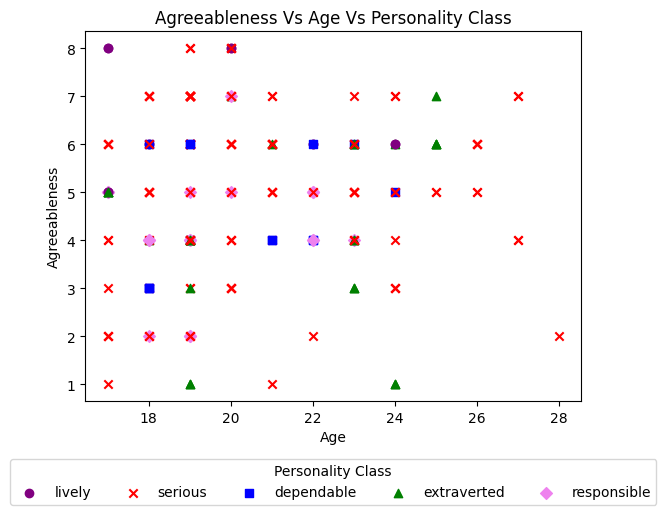

In [55]:
import matplotlib.pyplot as plt


# # Define marker and color mapping for each class label
class_mapping = {class_label: {'marker': y_marker[class_label], 'color': y_color[class_label]} for class_label in y_color.keys()}

# Create plot
fig, ax = plt.subplots()

X_train.reset_index(drop=True, inplace=True)

c = 0

# Age vs Trait X Target as symbol

# Iterate over each row in X_train
for index, row in X_train.iterrows():
    # print()
    # print('index: ', str(index))
    # print('row: ', str(row))
    # print('age: ', str(row['Age']))  # 
    # print('agreeableness: ', str(row['agreeableness']))  # 

    # Get corresponding class label for current row
    class_label = y_train.iloc[index]['Personality (Class label)']
    # print('class: ',class_label)
    
    # Get corresponding color for each column in current row
    row_colors = [colors[col] for col in X_train.columns]
    
    # Get corresponding marker for current class label
    marker = markers[class_label]
    
    # Plot current row
    # ax.scatter(row, [index]*len(row), c=row_colors, marker=marker)
    
    ax.scatter(row['Age'], row['agreeableness'], c=y_color[class_label], 
               marker=y_marker[class_label])

    c = c + 10
    if c == 5:
        break

# Create a legend for the markers and colors
for class_label, class_info in class_mapping.items():
    ax.scatter([], [], c=class_info['color'], marker=class_info['marker'], 
               label=class_label)

# Set x-axis label
ax.set_xlabel('Age')

# Set y-axis label
ax.set_ylabel('Agreeableness')

# Set plot title
ax.set_title('Agreeableness Vs Age Vs Personality Class')

# Show the legend
ax.legend(title='Personality Class', loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=len(class_mapping))

# Show the plot
plt.show()

In [56]:
# import matplotlib.pyplot as plt

# # Define marker and color mapping for each class label
# class_mapping = {class_label: {'marker': y_marker[class_label], 'color': y_color[class_label]} for class_label in y_color.keys()}


# # Create plot
# fig, ax = plt.subplots()

# # Iterate over each row in X_train
# for index, row in X_train.iterrows():
    
#     # Get corresponding class label for current row
#     class_label = y_train.iloc[index]['Personality (Class label)']
    
#     # Get corresponding color and marker for current class label
#     class_marker = class_mapping[class_label]['marker']
#     class_color = class_mapping[class_label]['color']
    
#     ax.scatter(row['Age'], row['agreeableness'], c=class_color, 
#                marker=class_marker,
#               alpha=0.5)

# # Create a legend for the markers and colors
# for class_label, class_info in class_mapping.items():
#     ax.scatter([], [], c=class_info['color'], marker=class_info['marker'], 
#                label=class_label,
#               )

# # Set x-axis label
# ax.set_xlabel('Feature value')

# # Set y-axis label
# ax.set_ylabel('Data point')

# # Set plot title
# ax.set_title('Scatter plot of X_train')

# # Show the legend
# ax.legend()

# # Show the plot
# plt.show()

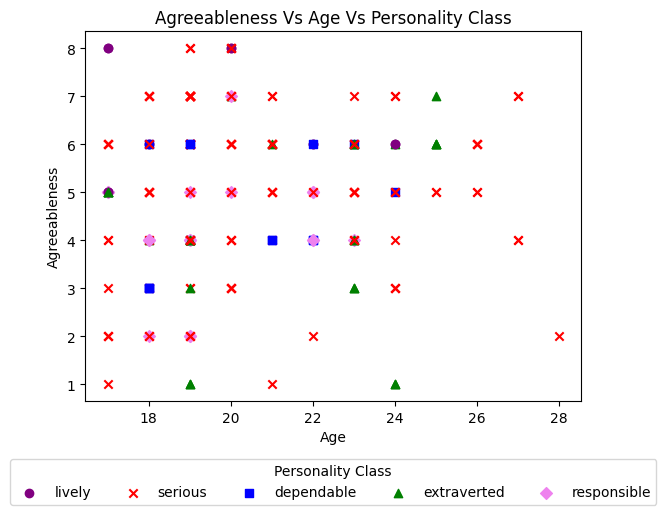

In [57]:
def plot_graph(class_, X_train, y_train):
    import matplotlib.pyplot as plt

    # Create plot
    fig, ax = plt.subplots()

    X_train.reset_index(drop=True, inplace=True)

    # c = 0

    # Age vs Trait X Target as symbol

    # Iterate over each row in X_train
    for index, row in X_train.iterrows():
        # print()
        # print('index: ', str(index))
        # print('row: ', str(row))
        # print('age: ', str(row['Age']))  # 
        # print('agreeableness: ', str(row['agreeableness']))  # 

        # Get corresponding class label for current row
        class_label = y_train.iloc[index]['Personality (Class label)']
        # print('class: ',class_label)

        # Get corresponding color for each column in current row
        row_colors = [colors[col] for col in X_train.columns]

        # Get corresponding marker for current class label
        marker = markers[class_label]

        # Plot current row
        # ax.scatter(row, [index]*len(row), c=row_colors, marker=marker)

        ax.scatter(row['Age'], row[class_], c=y_color[class_label], 
                   marker=y_marker[class_label])

        # c = c + 10
        # if c == 5:
        #     break

    # Create a legend for the markers and colors
    for class_label, class_info in class_mapping.items():
        ax.scatter([], [], c=class_info['color'], marker=class_info['marker'], 
                   label=class_label)

    # Set x-axis label
    ax.set_xlabel('Age')

    # Set y-axis label
    ax.set_ylabel(class_.title())

    # Set plot title
    tmp = class_.title()
    tmp =  tmp + ' Vs Age Vs Personality Class'
    ax.set_title(tmp)

    # Show the legend
    ax.legend(title='Personality Class', loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=len(class_mapping))

    # Show the plot
    plt.show()
    
plot_graph('agreeableness', X_train, y_train)

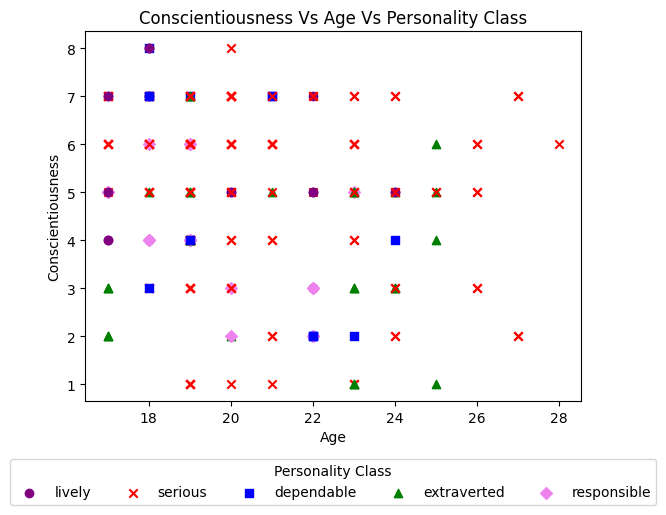

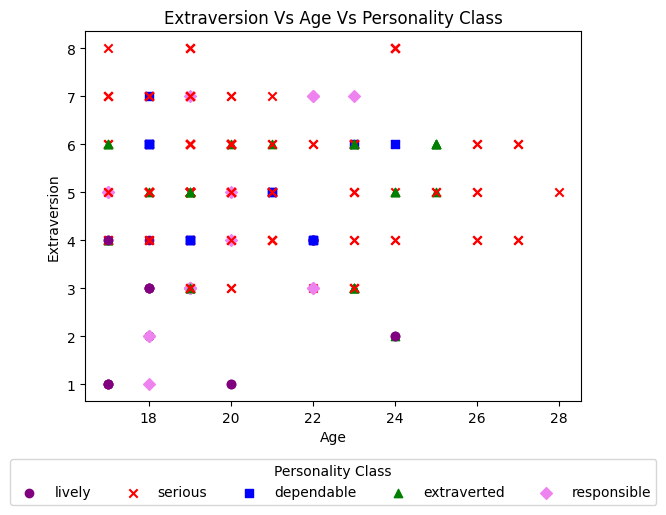

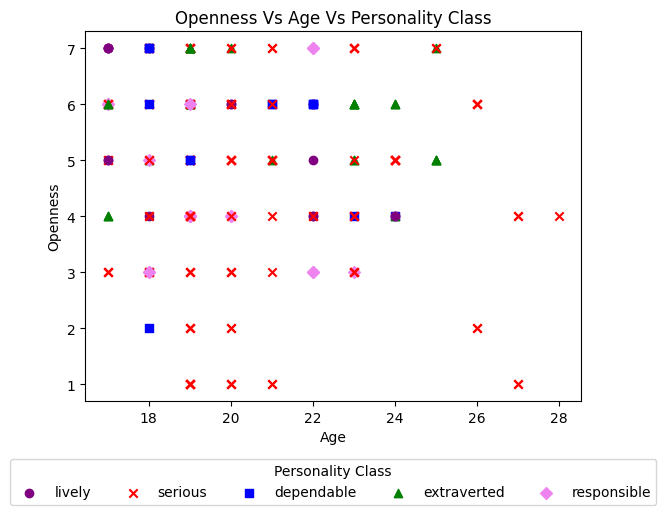

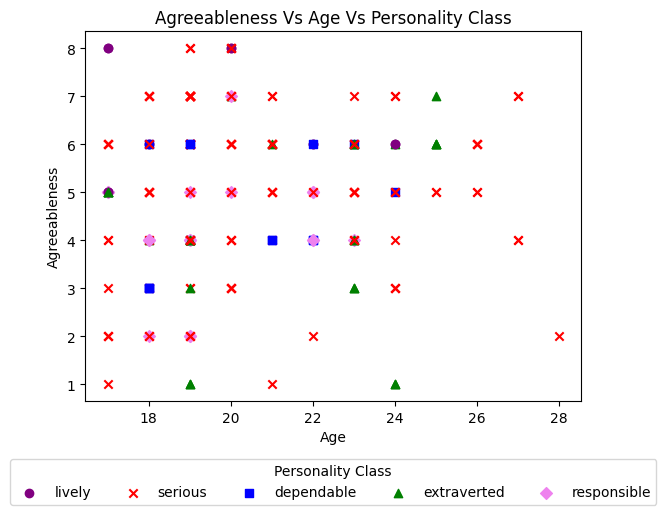

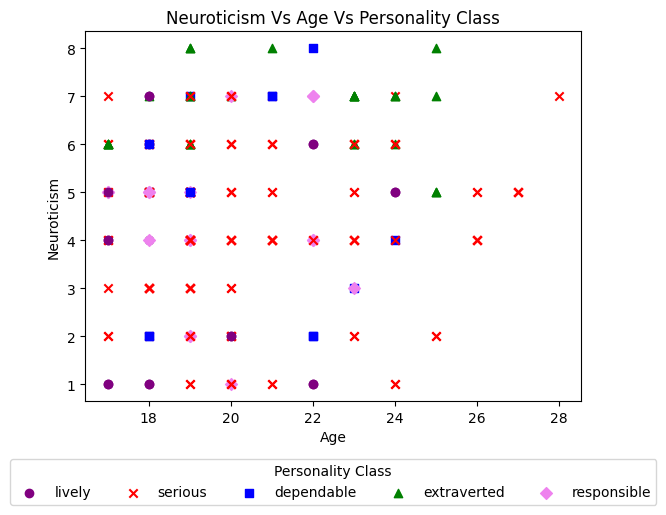

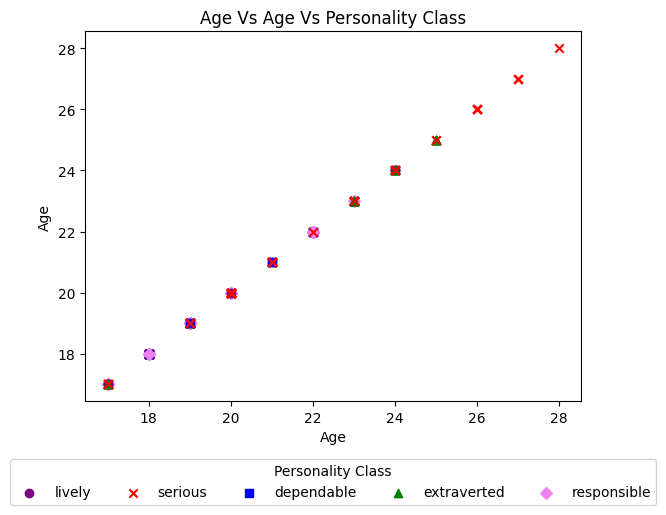

In [58]:
for i in set(X_train.columns):   # Output
    plot_graph(i, X_train, y_train)

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [60]:
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

/tmp/ipykernel_5420/2111249569.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [61]:
X_train.head()

,conscientiousness,extraversion,openness,agreeableness,neuroticism,Age
0,3,4,4,5,6,22
1,7,4,4,4,5,27
2,2,7,7,5,7,22
3,8,2,7,4,7,18
4,2,4,6,4,2,22


In [62]:
# Create cluster feature
kmeans = KMeans(n_clusters=len(set(y_train['Personality (Class label)'])))
X["Cluster"] = kmeans.fit_predict(X)
X["Cluster"] = X["Cluster"].astype("category")

X.head()

/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,conscientiousness,extraversion,openness,agreeableness,neuroticism,Age,Cluster
225,7,3,7,4,8,19,4
259,7,7,7,6,4,20,1
58,7,6,5,7,2,19,1
8,5,6,6,6,4,20,1
221,5,5,5,4,7,18,4


In [63]:
list(X['Cluster'])[:10]

[4, 1, 1, 1, 4, 2, 4, 3, 1, 3]

In [64]:
list(y_train['Personality (Class label)'])[:10]

['lively',
 'serious',
 'responsible',
 'lively',
 'dependable',
 'serious',
 'serious',
 'serious',
 'serious',
 'serious']

In [65]:
# Create cluster feature
kmeans = KMeans(n_clusters=len(set(y_train['Personality (Class label)'])))
X_train["Cluster"] = kmeans.fit_predict(X_train[['agreeableness', 	
                                           'openness', 	
                                           'extraversion', 	
                                           'conscientiousness', 	
                                           'Age', 	
                                           'neuroticism']])
X_train["Cluster"] = X_train["Cluster"].astype("category")

/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [66]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd

# Create an instance of the OrdinalEncoder
encoder = OrdinalEncoder()

# Fit the encoder on the column you want to encode
encoder.fit(y_train[['Personality (Class label)']])

# Transform the column
# df['A'] = 
encoder.transform(y_train[['Personality (Class label)']])[:10]

# View the resulting dataframe
# print(df)

array([[2.],
       [4.],
       [3.],
       [2.],
       [0.],
       [4.],
       [4.],
       [4.],
       [4.],
       [4.]])

In [67]:
for i in range(10):
    print(encoder.transform(y_train[['Personality (Class label)']])[i])

[2.]
[4.]
[3.]
[2.]
[0.]
[4.]
[4.]
[4.]
[4.]
[4.]


In [68]:
tmp = encoder.transform(y_train[['Personality (Class label)']])
len(tmp)

tmp_2 = list(X_train["Cluster"])
len(tmp_2)

222

In [69]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# print("Accuracy: ",metrics.accuracy_score(
#     np.ravel(encoder.transform(y_train[['Personality (Class label)']])), 
#     np.ravel(list(X_train["Cluster"])))*100, '%', sep='')


print("Accuracy: ",metrics.accuracy_score(
    np.ravel(tmp), 
    np.ravel(tmp_2))*100, '%', sep='')


# print("Mean Absolute Error: ",metrics.mean_absolute_error(np.ravel(tmp_2), np.ravel(y_pred))*100, '%', sep='')

# from sklearn.model_selection import cross_val_score

# # Multiply by -1 since sklearn calculates *negative* MAE
# scores = -1 * cross_val_score(clf, X, np.ravel(y_enc),
#                               cv=5,
#                               scoring='neg_mean_absolute_error')

# print("MAE scores:\n", scores)

# print("Average MAE score (across experiments):")
# print(scores.mean())

Accuracy: 13.063063063063062%


In [70]:
# Create cluster feature
kmeans = KMeans(n_clusters=len(set(y_test['Personality (Class label)'])))
X_test["Cluster"] = kmeans.fit_predict(X_test[['agreeableness', 	
                                           'openness', 	
                                           'extraversion', 	
                                           'conscientiousness', 	
                                           'Age', 	
                                           'neuroticism']])
X_test["Cluster"] = X_test["Cluster"].astype("category")

tmp = encoder.transform(y_test[['Personality (Class label)']])
len(tmp)

tmp_2 = list(X_test["Cluster"])
len(tmp_2)

/media/scarlet/Project/Project Files/PythonEnvs/DataSciEnv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


96

In [71]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# print("Accuracy: ",metrics.accuracy_score(
#     np.ravel(encoder.transform(y_train[['Personality (Class label)']])), 
#     np.ravel(list(X_train["Cluster"])))*100, '%', sep='')


print("Accuracy: ",metrics.accuracy_score(
    np.ravel(tmp), 
    np.ravel(tmp_2))*100, '%', sep='')

Accuracy: 9.375%


In [72]:
X_train

,conscientiousness,extraversion,openness,agreeableness,neuroticism,Age,Cluster
0,3,4,4,5,6,22,4
1,7,4,4,4,5,27,1
2,2,7,7,5,7,22,4
3,8,2,7,4,7,18,0
4,2,4,6,4,2,22,2
...,...,...,...,...,...,...,...
217,7,6,5,8,3,20,3
218,7,7,1,8,6,19,3
219,4,2,3,4,5,18,2
220,6,7,3,3,7,17,0


In [73]:
for i in range(50):
    print(str(tmp[i]), " : ", str(tmp_2[i]))

[4.]  :  0
[3.]  :  1
[1.]  :  0
[2.]  :  4
[2.]  :  4
[4.]  :  2
[4.]  :  4
[4.]  :  1
[4.]  :  2
[0.]  :  2
[3.]  :  2
[4.]  :  3
[1.]  :  2
[4.]  :  4
[4.]  :  3
[2.]  :  3
[0.]  :  2
[4.]  :  2
[4.]  :  0
[4.]  :  2
[4.]  :  3
[4.]  :  3
[4.]  :  3
[4.]  :  3
[4.]  :  3
[4.]  :  1
[2.]  :  4
[2.]  :  3
[4.]  :  2
[1.]  :  2
[3.]  :  0
[2.]  :  3
[4.]  :  2
[4.]  :  2
[1.]  :  0
[1.]  :  0
[3.]  :  2
[0.]  :  0
[4.]  :  2
[4.]  :  1
[2.]  :  2
[4.]  :  0
[1.]  :  0
[4.]  :  3
[1.]  :  0
[4.]  :  3
[4.]  :  1
[0.]  :  2
[0.]  :  0
[4.]  :  2


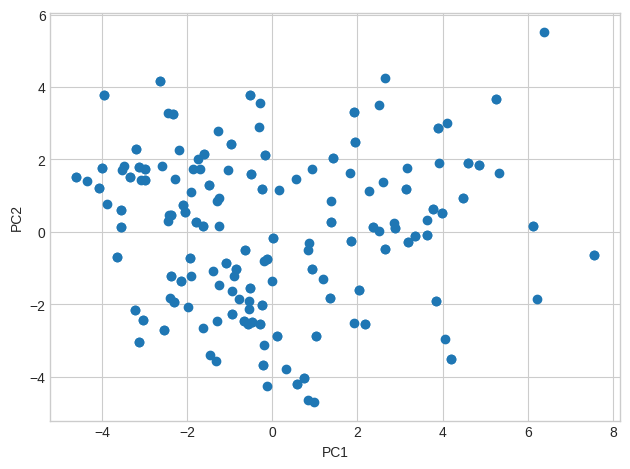

In [77]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the categorical feature
# Perform PCA on the numerical data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Visualize the transformed data
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [75]:
X_train

,conscientiousness,extraversion,openness,agreeableness,neuroticism,Age,Cluster
0,3,4,4,5,6,22,4
1,7,4,4,4,5,27,1
2,2,7,7,5,7,22,4
3,8,2,7,4,7,18,0
4,2,4,6,4,2,22,2
...,...,...,...,...,...,...,...
217,7,6,5,8,3,20,3
218,7,7,1,8,6,19,3
219,4,2,3,4,5,18,2
220,6,7,3,3,7,17,0


In [79]:
# import matplotlib.pyplot as plt

# plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train)
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.show()

In [ ]:
# y_train

In [92]:
# # Scale the data
# X_train_scaled = X_train / np.max(X_train)
# X_test_scaled = X_test / np.max(X_test)

# from sklearn.preprocessing import scale

# X_train_scaled = scale(X_train)
# X_test_scaled = scale(X_test)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [94]:
X_test_scaled

,conscientiousness,extraversion,openness,agreeableness,neuroticism,Age,Cluster
0,0.714286,0.571429,0.500000,0.142857,0.857143,1.000000,0.00
1,0.285714,0.714286,0.666667,0.857143,0.571429,0.181818,0.25
2,0.714286,0.571429,0.666667,0.714286,0.571429,0.727273,0.00
3,0.571429,0.142857,0.833333,0.142857,0.142857,0.636364,1.00
4,0.857143,0.285714,1.000000,0.142857,0.571429,0.454545,1.00
...,...,...,...,...,...,...,...
91,0.571429,0.285714,0.666667,0.428571,0.571429,0.181818,0.50
92,0.857143,1.000000,0.833333,0.000000,0.285714,0.000000,0.50
93,0.000000,0.571429,0.666667,0.571429,0.000000,0.181818,0.25
94,0.571429,0.714286,0.666667,0.714286,1.000000,0.363636,0.00


In [95]:
from sklearn.preprocessing import OneHotEncoder

def one_hot_encode(y_train):
    #creating instance of one-hot-encoder
    encoder = OneHotEncoder(handle_unknown='ignore')

    #perform one-hot encoding on 'team' column 
    encoder_df = pd.DataFrame(encoder.fit_transform(y_train).toarray())

    #merge one-hot encoded columns back with original DataFrame
    # final_df = df.join(encoder_df)

    #view final df
    encoder_df.columns = encoder.categories_

    return encoder_df

y_train_ohe = one_hot_encode(y_train)
y_test_ohe = one_hot_encode(y_test)

In [103]:
from tensorflow import keras

In [104]:
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(X_train_scaled.shape[1],), 
                       activation='relu'),
    keras.layers.Dense(y_train_ohe.shape[1], 
                       activation='softmax')
])

In [105]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [107]:
model.fit(X_train_scaled, y_train_ohe, epochs=10, batch_size=32)

Epoch 1/10
7/7 [==============================] - 2s 9ms/step - loss: 1.6588 - accuracy: 0.1216
Epoch 2/10
7/7 [==============================] - 0s 3ms/step - loss: 1.5523 - accuracy: 0.1351
Epoch 3/10
7/7 [==============================] - 0s 2ms/step - loss: 1.4630 - accuracy: 0.3559
Epoch 4/10
7/7 [==============================] - 0s 2ms/step - loss: 1.3830 - accuracy: 0.5856
Epoch 5/10
7/7 [==============================] - 0s 2ms/step - loss: 1.3085 - accuracy: 0.6396
Epoch 6/10
7/7 [==============================] - 0s 2ms/step - loss: 1.2463 - accuracy: 0.6396
Epoch 7/10
7/7 [==============================] - 0s 3ms/step - loss: 1.1972 - accuracy: 0.6396
Epoch 8/10
7/7 [==============================] - 0s 3ms/step - loss: 1.1595 - accuracy: 0.6396
Epoch 9/10
7/7 [==============================] - 0s 2ms/step - loss: 1.1286 - accuracy: 0.6396
Epoch 10/10
7/7 [==============================] - 0s 2ms/step - loss: 1.1109 - accuracy: 0.6396


In [108]:
test_loss, test_acc = model.evaluate(X_test_scaled, y_test_ohe)
print('Test accuracy:', test_acc)

3/3 [==============================] - 0s 2ms/step - loss: 1.1115 - accuracy: 0.6458
Test accuracy: 0.6458333134651184


In [109]:
predictions = model.predict(X_test_scaled)

3/3 [==============================] - 0s 2ms/step


In [123]:
np.argmax(predictions, axis=1)

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4])

In [124]:
model.predict(X_train_scaled)

7/7 [==============================] - 0s 1ms/step


array([[0.06500726, 0.17299221, 0.09208716, 0.09259596, 0.57731736],
       [0.06342358, 0.14273722, 0.0929985 , 0.07455731, 0.6262834 ],
       [0.05681001, 0.15048397, 0.07389679, 0.07881946, 0.63998973],
       ...,
       [0.09370027, 0.15817688, 0.12992054, 0.11871706, 0.4994853 ],
       [0.0831423 , 0.10119594, 0.10432532, 0.09824564, 0.6130908 ],
       [0.07921749, 0.13069142, 0.10332734, 0.08620789, 0.60055584]],
      dtype=float32)

In [125]:
np.argmax(model.predict(X_train_scaled), axis=1)

7/7 [==============================] - 0s 1ms/step


array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4])